# Classification with neural networks

In [1]:
from nnet import NeuralNetwork
from nnet.activations import Sigmoid, Identity, Relu
from nnet.losses import BinomialLoss, QuadraticLoss

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt; plt.style.use("fivethirtyeight")
from matplotlib.colors import ListedColormap

In [5]:
# Visualization tool

def plot_decision_regions(X, y, classifier, resolution=0.02):
    """
    Funciton to plot decision regions.
    Credits: Sebastian Raschka 
    (https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch02/ch02.ipynb)
    """

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    margin = 0.5
    x1_min, x1_max = X[:, 0].min() - margin, X[:, 0].max() + margin
    x2_min, x2_max = X[:, 1].min() - margin, X[:, 1].max() + margin
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]))
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

# Data preprocessing tool

def add_one_feature(x):
    """Transforimng input matrix to have a feature consisting of all ones."""
    assert len(x.shape) == 2
    n = x.shape[1]
    return np.vstack([x, np.ones([1, n])])

## Building neural network - simple example

(500, 3)


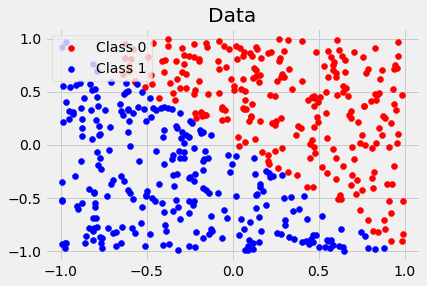

,x,y,cls
0,-0.224524,-0.345520,1
1,-0.377200,0.995583,0
2,-0.788321,0.453267,1
3,-0.601054,0.694200,0
4,0.926908,-0.373745,0


In [6]:
# Read data
data = pd.read_csv("data/classification/data.simple.train.500.csv")
data["cls"] = data["cls"] - 1
print(data.shape)

# Plot data
data0 = data[data.cls == 0]
data1 = data[data.cls == 1]

plt.scatter(data0.x, data0.y, c="red", label="Class 0")
plt.scatter(data1.x, data1.y, c="blue", label="Class 1")
plt.legend()
plt.title("Data")
plt.show()

data.head()

As always, let's start with the simplest case of a neural network with no hidden layers. In this way, the model is a logistics regression: probably one of the most popular and simplest classifiers.

In [4]:
# Prepare data

x_train = data[["x", "y"]].values.transpose()
x_train = add_one_feature(x_train)
y_train = data[["cls"]].values.transpose()

In [59]:
def train_and_plot_net(net, **kwargs):
    net.fit(x_train, y_train, **kwargs)
    y_pred = net(x_train)
    y_hat = [1 if y > 0.5 else 0 for y in y_pred[0]]
    accuracy = np.mean(y_hat == data.cls.values)
    print("Accuracy: {}".format(accuracy))
    plot_decision_regions(data[["x", "y"]].values, data.cls.values, net)

100%|██████████| 100000/100000 [00:07<00:00, 13653.78it/s]


Training completed. Loss: 0.06051354368189205
Accuracy: 0.978


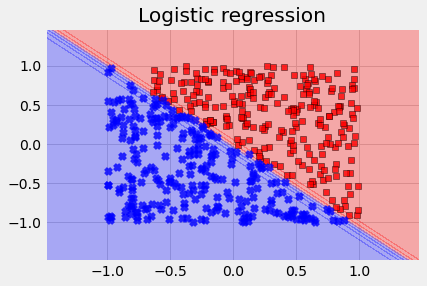

In [60]:
net = NeuralNetwork(3, [(1, Sigmoid())], BinomialLoss(), sd=1e-2)
train_and_plot_net(net, lr=0.1, n_iter=100_000)
plt.title("Logistic regression");

Red squares are points that belong to one class and blue ones belong to second. Also, red regions is a region of points that our classifier would classify as red squares, same for blue ones. As we can see, this network predicts both classes quite well. We also see, that the decision boundary is linear - which we know from the form of the model as well. The mistakes the network are not huge and we see that overall it is good enough, but let's try to tweak it a little bit.

100%|██████████| 50000/50000 [00:08<00:00, 6215.07it/s]


Training completed. Loss: 0.05207206709193622
Accuracy: 0.986


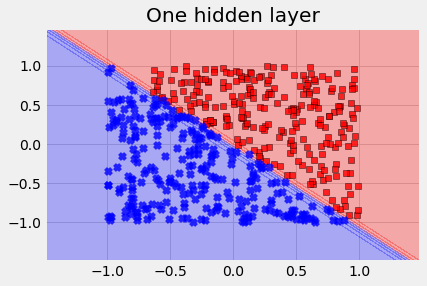

In [61]:
net = NeuralNetwork(3, [(10, Relu()), (1, Sigmoid())], BinomialLoss(), sd=1e-2)
train_and_plot_net(net, lr=0.01, n_iter=50_000)
plt.title("One hidden layer");

As we see this classifier (with additional hidden layer) is not linear and managed to the decision boundary to fit data a little bit better. It says something about the power of the classifier, but not always is good, because the classifier might overfit more easily.

## Non-linear examples
That was a stupid data set, with clear linear boundary. Let's try our network on something more challenging.

### Two splashes

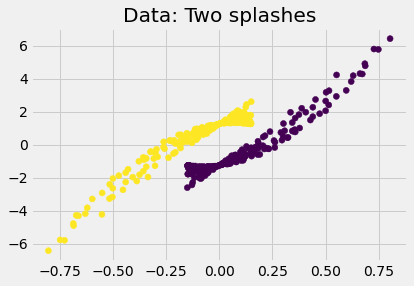

In [14]:
data = pd.read_csv("data/classification/twosplashes.data", header=None, sep=" ")
labels = pd.read_csv("data/classification/twosplashes.labels0", header=None)
data.head()
plt.scatter(data[0], data[1], c=labels)
plt.title("Data: Two splashes");

In [6]:
# Prepare data
x_train = data[[0, 1]].values.transpose()
x_train = add_one_feature(x_train)
y_train = labels.values.transpose() - 1

In [7]:
def train_and_plot_net(net, **kwargs):
    net.fit(x_train, y_train, **kwargs)
    y_pred = net(x_train)
    y_hat = [1 if y > 0.5 else 0 for y in y_pred[0]]
    accuracy = np.mean(y_hat == y_train[0])
    print("Accuracy: {}".format(accuracy))
    plot_decision_regions(data[[0, 1]].values, y_train[0], net)

100%|██████████| 100000/100000 [00:06<00:00, 14931.84it/s]


Training completed. Loss: 0.21490991128302703
Accuracy: 0.9375


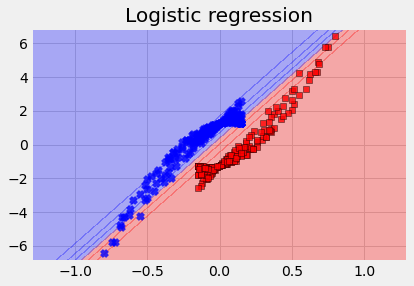

In [8]:
net = NeuralNetwork(3, [(1, Sigmoid())], BinomialLoss(), sd=1e-2)
train_and_plot_net(net, lr=0.01, n_iter=100_000)
plt.title("Logistic regression");

In this example we clearly see that linear classifier is not enough for this dataset. Let's compare it with a neural network with one hidden layer.

100%|██████████| 200000/200000 [00:28<00:00, 6969.44it/s]


Training completed. Loss: 0.007602873052087407
Accuracy: 1.0


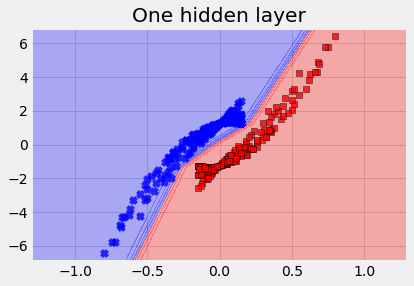

In [9]:
np.random.seed(1)
net = NeuralNetwork(3, [(10, Relu()), (1, Sigmoid())], BinomialLoss(), sd=1e-2)
train_and_plot_net(net, lr=0.01, n_iter=200_000)
plt.title("One hidden layer");

We see that non-linear neural network is able to bend the decision boundary and achieve $100\%$ accuracy.

Let's see how Quadratic Error would do here. Note however, that this loss doesn't make sense in this context from probabilistic perspective. It assumes Normal distribution on $y$, which is simply not correct since $y$ is binary. The only possible distribution here is Bernoulli and thus only BinomialLoss makes sense. However, treating neural network as a function approximator, we can try and see how good is it with quadratic loss.

100%|██████████| 200000/200000 [00:24<00:00, 8038.23it/s]


Training completed. Loss: 0.0005149928496484264
Accuracy: 1.0


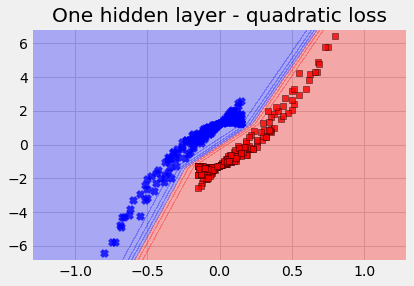

In [11]:
np.random.seed(1)
net = NeuralNetwork(3, [(10, Relu()), (1, Sigmoid())], QuadraticLoss(), sd=1e-2)
train_and_plot_net(net, lr=0.01, n_iter=200_000)
plt.title("One hidden layer - quadratic loss");

It did ok, so wee see that statistics is not crucial for people doing deep learning who don't care about mathematics.
### Cirlcles

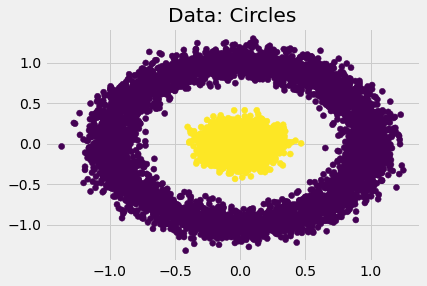

In [7]:
from sklearn.datasets import make_circles

n = 10_000
np.random.seed(42)
x, y = make_circles(n_samples=n, factor=.1, noise=.1)

plt.scatter(x[:, 0], x[:, 1], c=y)
plt.title("Data: Circles");

In [8]:
x_train = add_one_feature(x.transpose())
y_train = y.reshape([1, -1])
assert (y_train[0] == y).all()

In [9]:
def train_and_plot_net(net, **kwargs):
    net.fit(x_train, y_train, **kwargs)
    y_pred = net(x_train)
    y_hat = [1 if y > 0.5 else 0 for y in y_pred[0]]
    accuracy = np.mean(y_hat == y_train[0])
    print("Accuracy: {}".format(accuracy))
    plot_decision_regions(x, y_train[0], net)

100%|██████████| 10000/10000 [00:21<00:00, 459.93it/s]


Training completed. Loss: 0.8250261040194031
Accuracy: 0.5


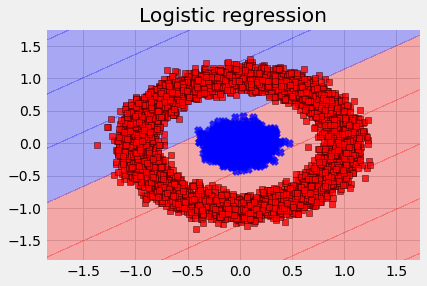

In [12]:
net = NeuralNetwork(3, [(1, Sigmoid())], BinomialLoss(), sd=1e-3)
train_and_plot_net(net, lr=0.01, n_iter=10_000)
plt.title("Logistic regression");

100%|██████████| 100000/100000 [09:54<00:00, 168.30it/s]


Training completed. Loss: 0.7970361210722163
Accuracy: 0.5


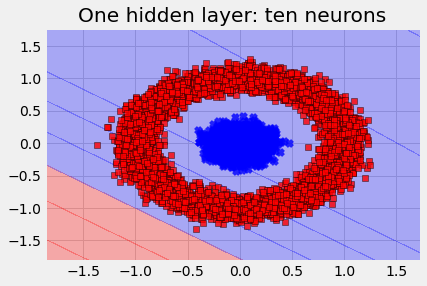

In [11]:
np.random.seed(2)
net = NeuralNetwork(3, [(10, Relu()), (1, Sigmoid())], BinomialLoss(), sd=1e-2)
train_and_plot_net(net, lr=0.001, n_iter=100_000)
plt.title("One hidden layer: ten neurons");

Even though the decision boundary is more complicated and non-linear, two neurons in hidden layer is not enough to make a classification in this example. We need to go to higher dimensions of hidden representation and more iterations in order to achieve what we want. Also, here we encounter difficulty in training.  It would be beneficial to merge sigmoid and loss layers into one, which would simplify and speed up computations as well as help with numerical issues (especially since we need a lot of iterations here). It is interesting to see, that it is easier to train network with 15 neurons rather than 10 as we will se below.

100%|██████████| 100000/100000 [13:59<00:00, 119.14it/s]


Training completed. Loss: 0.01574353731175754
[[9.27723557e-01 1.17092415e-05 1.40665112e-03 ... 9.95028749e-01
  4.68348338e-04 9.21016395e-01]]
Accuracy: 0.9999


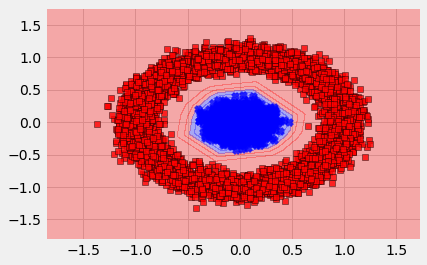

In [123]:
np.random.seed(42)
net = NeuralNetwork(3, [(15, Relu()), (1, Sigmoid())], BinomialLoss(), sd=1e-2)
train_and_plot_net(net, lr=0.01, n_iter=100_000)

Finally, we see that neural networks are able to learn even more complicated decision functions.